In [ ]:
# Importando bibliotecas

import pandas as pd

In [ ]:
#fazendo a conexao co Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tabela_energia.csv')

In [ ]:
#Convertendo a coluna valor para
final.valor= pd.to_numeric(final.valor , errors='coerce')

In [ ]:
final

,nome_pais,pais_regiao,pais_bloco,pais_renda,tipo,nome_setor,nome_produto,ano,valor
0,Australia,East Asia & Pacific,AUS,High income,NRW,Production (PJ),"Coal, peat and oil shale",1971,1368.252
1,Australia,East Asia & Pacific,AUS,High income,NRW,Total energy supply (PJ),"Coal, peat and oil shale",1971,884.297
2,Australia,East Asia & Pacific,AUS,High income,NRW,Total final consumption (PJ),"Coal, peat and oil shale",1971,220.404
3,Australia,East Asia & Pacific,AUS,High income,NRW,Industry (PJ),"Coal, peat and oil shale",1971,204.458
4,Australia,East Asia & Pacific,AUS,High income,NRW,Transport (PJ),"Coal, peat and oil shale",1971,3.432
...,...,...,...,...,...,...,...,...,...
93517,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Other final consumption (PJ),Electricity,2020,162.327
93518,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Production (PJ),Heat,2020,3.629
93519,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Total energy supply (PJ),Heat,2020,3.629
93520,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Electricity output (GWh),Fossil fuels,2020,640427.364


In [ ]:
pd.set_option('float_format', '{:.3f}'.format)

In [ ]:
# só as colunas que interessam
final_valores_agrupados = final.loc[:, ['ano', 'valor']]

#junto pelo mes_ano igual somando a quantidade_itens
valor_total = final_valores_agrupados.groupby(['ano']).sum().reset_index()
valor_total

,ano,valor
0,1971,4573626.350
1,1972,4936413.396
2,1973,5297572.875
3,1974,5345030.270
4,1975,5427332.902
5,1976,5789545.632
6,1977,6029086.108
7,1978,6289908.694
8,1979,6523633.338
9,1980,6624631.201


In [ ]:
# Verificando valores missing
print(final.isna().sum())

nome_pais       0
pais_regiao     0
pais_bloco      0
pais_renda      0
tipo            0
nome_setor      0
nome_produto    0
ano             0
valor           0
dtype: int64


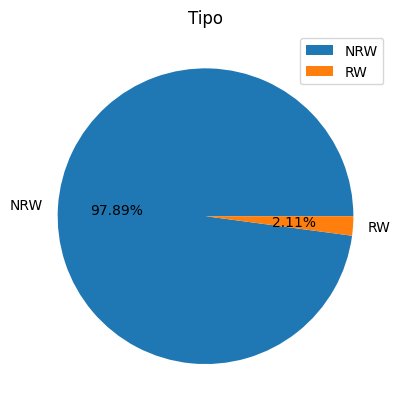

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de Pizza de Tipos de Visitantes
labels = ['NRW', 'RW']
plt.title("Tipo")
plt.pie(final['tipo'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()
plt.show()

In [ ]:
Outlier = final['valor']
Outlier

0         1368.252
1          884.297
2          220.404
3          204.458
4            3.432
           ...    
93517      162.327
93518        3.629
93519        3.629
93520   640427.364
93521   184009.911
Name: valor, Length: 93522, dtype: float64

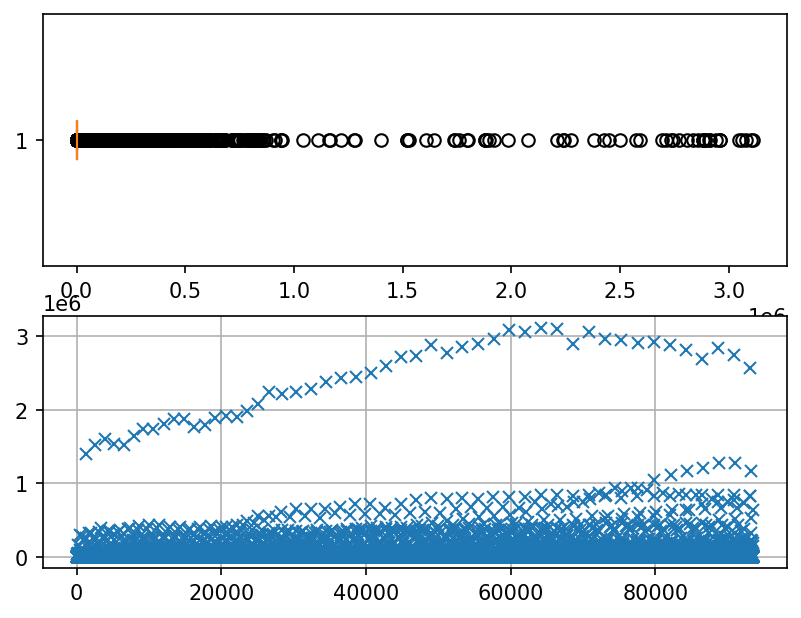

In [ ]:
plt.figure(dpi=150)
plt.subplot(211)
plt.boxplot(Outlier, vert=False)
plt.subplot(212)
plt.plot(Outlier, 'x')
plt.grid()
plt.show()

In [ ]:
produto = final['nome_produto']
total = final['valor']

Text(0.5, 1.0, 'Valor Total de cada produto')

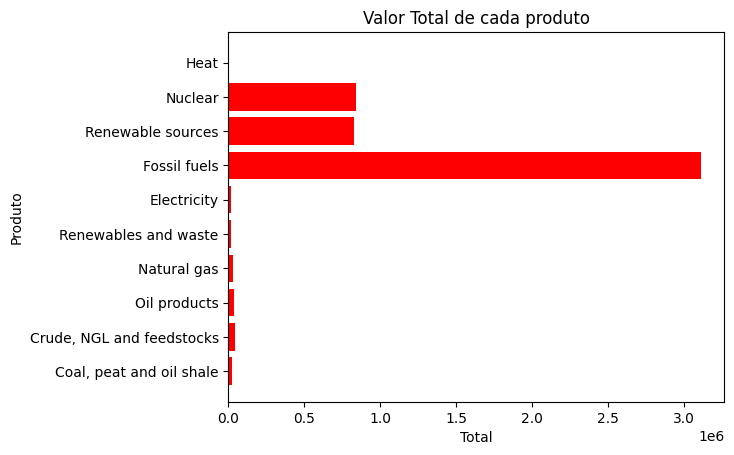

In [ ]:
plt.barh(produto, total, color = 'red')
plt.ylabel("Produto")
plt.xlabel("Total")
plt.title("Valor Total de cada produto")

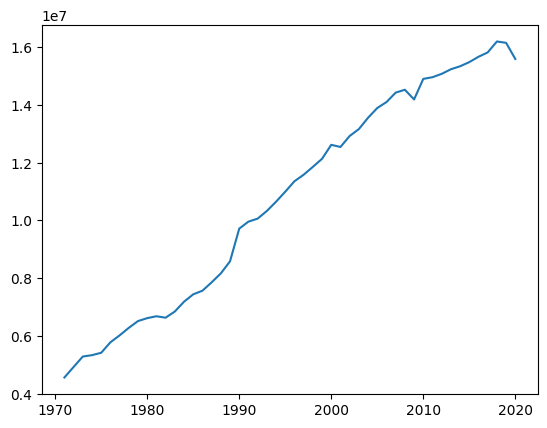

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(valor_total['ano'], valor_total['valor'])


#Treinamento de modelo

In [ ]:
#importando as Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pl

In [ ]:
ano = valor_total['ano'].values.reshape(-1, 1)
producao_energia_limpa = valor_total['valor'].values

In [ ]:
x= valor_total['ano'].values.reshape(-1, 1)
y = valor_total['valor'].values.reshape(-1, 1)

##Os dados foram dividido em conjunto de dados treinamento e um conjunto de dados de teste.

X é a sua matriz de recursos de entrada

Y é o seu array de rótulos de saída

test_size = 0.1 afirma  que seus dados de teste representem 10% de seus dados gerais

random_state=42 Controla o embaralhamento aplicado aos dados antes de aplicar a divisão.

In [ ]:
#X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(x, y)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(x, y, test_size= 0.1, train_size=0.8, random_state=42)

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_treinamento, y_treinamento)

LinearRegression()

In [ ]:
anos_futuros = np.arange(2021, 2031).reshape(-1,1)
previsao_energia_limpa = modelo.predict(anos_futuros)

In [ ]:
y_pred = modelo.predict(previsao_energia_limpa)

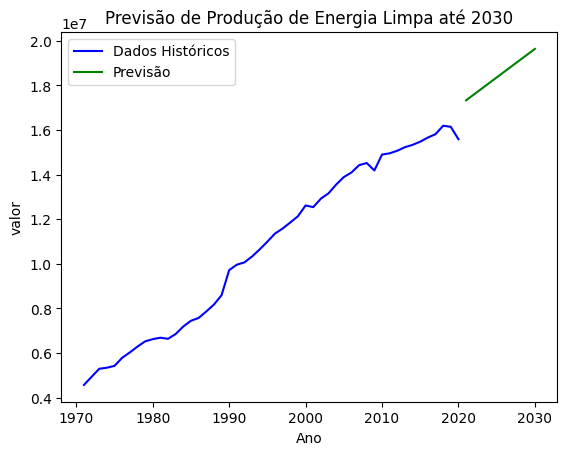

In [ ]:
plt.plot(ano,producao_energia_limpa, label='Dados Históricos', color='blue')
plt.plot(anos_futuros, previsao_energia_limpa, label='Previsão', color='green')
plt.xlabel('Ano')
plt.ylabel('valor')
plt.title('Previsão de Produção de Energia Limpa até 2030')
plt.legend()
plt.show()

In [ ]:
tabelaPprevisao = {'ano': [2021,2022,2023,2024,2025,2026,2027,2028,2029,2030], 'valor': [17328279.30608994,17584144.27618468,17840009.24627942,18095874.21637416,18351739.1864689,18607604.15656364,18863469.12665838,19119334.09675312,19375199.06684786,19631064.0369426]}
tabelaPprevisao= pd.DataFrame(data=tabelaPprevisao)
tabelaPprevisao

,ano,valor
0,2021,17328279.306
1,2022,17584144.276
2,2023,17840009.246
3,2024,18095874.216
4,2025,18351739.186
5,2026,18607604.157
6,2027,18863469.127
7,2028,19119334.097
8,2029,19375199.067
9,2030,19631064.037


In [ ]:
percentual = tabela_final['valor'].pct_change()
percentual

0       NaN
1     0.079
2     0.073
3     0.009
4     0.015
5     0.067
6     0.041
7     0.043
8     0.037
9     0.015
10    0.010
11   -0.007
12    0.032
13    0.049
14    0.035
15    0.017
16    0.038
17    0.039
18    0.051
19    0.131
20    0.025
21    0.010
22    0.026
23    0.031
24    0.033
25    0.033
26    0.020
27    0.023
28    0.024
29    0.040
30   -0.006
31    0.030
32    0.018
33    0.030
34    0.025
35    0.015
36    0.023
37    0.007
38   -0.023
39    0.050
40    0.004
41    0.008
42    0.011
43    0.007
44    0.009
45    0.012
46    0.010
47    0.024
48   -0.003
49   -0.035
0     0.112
1     0.015
2     0.015
3     0.014
4     0.014
5     0.014
6     0.014
7     0.014
8     0.013
9     0.013
Name: valor, dtype: float64

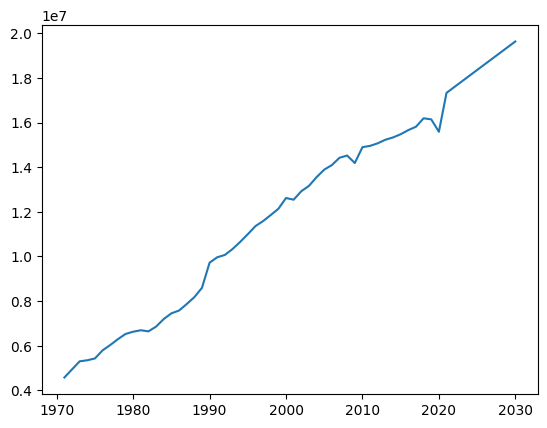

In [ ]:
plt.plot(tabela_final['ano'], tabela_final['valor'])